In [1]:
# 데이터 분석 패키지
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

#데이터 시각화(추세 등) 패키지
import seaborn as sns

# 가설검정 및 통계분석 패키지
from scipy import stats

# 회귀분석
from statsmodels.formula.api import ols

# ANOVA 분석 패키지
from statsmodels.stats.anova import anova_lm

# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant

# 선형모델 formula
import statsmodels.formula.api as smf

# 평가함수
from statsmodels.tools.eval_measures import rmse

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 학습용/평가용 데이터 분리 : train test
from sklearn.model_selection import train_test_split

# 선형 회귀 모형
from sklearn.linear_model import LinearRegression

# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

#Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

# 평가함수
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 예측/회귀
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier


# export_graphviz : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

# graphiz : 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR

# 로지스틱 회귀
from statsmodels.api import Logit

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# SMOTE
from imblearn.over_sampling import SMOTE

# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 한글 폰트 적용
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 데이터 구성 및 전처리

In [2]:
# 데이터 구성하기
df_raw = pd.read_csv('/content/sample_data/AIR_POLLUTION.csv', encoding='euc-kr')
df_raw

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-06-26,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,0.0,8.73
362,2020-06-27,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,0.0,6.21
363,2020-06-28,27.0,0.044,0.009,0.4,0.003,25.03,0.00,2.35,283,71.3,994.7,0.0,2.63
364,2020-06-29,36.0,0.026,0.028,0.6,0.003,24.06,1.26,2.48,103,75.5,992.9,0.0,7.58


In [3]:
# 데이터 속성 확인
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MeasDate   366 non-null    object 
 1   PM10       365 non-null    float64
 2   O3         365 non-null    float64
 3   NO2        365 non-null    float64
 4   CO         311 non-null    float64
 5   SO2        365 non-null    float64
 6   TEMP       366 non-null    float64
 7   RAIN       366 non-null    float64
 8   WIND       366 non-null    float64
 9   WIND_DIR   366 non-null    int64  
 10  HUMIDITY   366 non-null    float64
 11  ATM_PRESS  366 non-null    float64
 12  SNOW       366 non-null    float64
 13  CLOUD      366 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 40.2+ KB


In [4]:
# 데이터 행, 열 갯수 확인
df_raw.shape

(366, 14)

In [5]:
# 변수 타입 파악
df_raw.dtypes

MeasDate      object
PM10         float64
O3           float64
NO2          float64
CO           float64
SO2          float64
TEMP         float64
RAIN         float64
WIND         float64
WIND_DIR       int64
HUMIDITY     float64
ATM_PRESS    float64
SNOW         float64
CLOUD        float64
dtype: object

In [6]:
# 데이터 구성하기 - 결측치 처리
df_raw.isnull().sum()

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc9b973a10>,
      dtype=object)

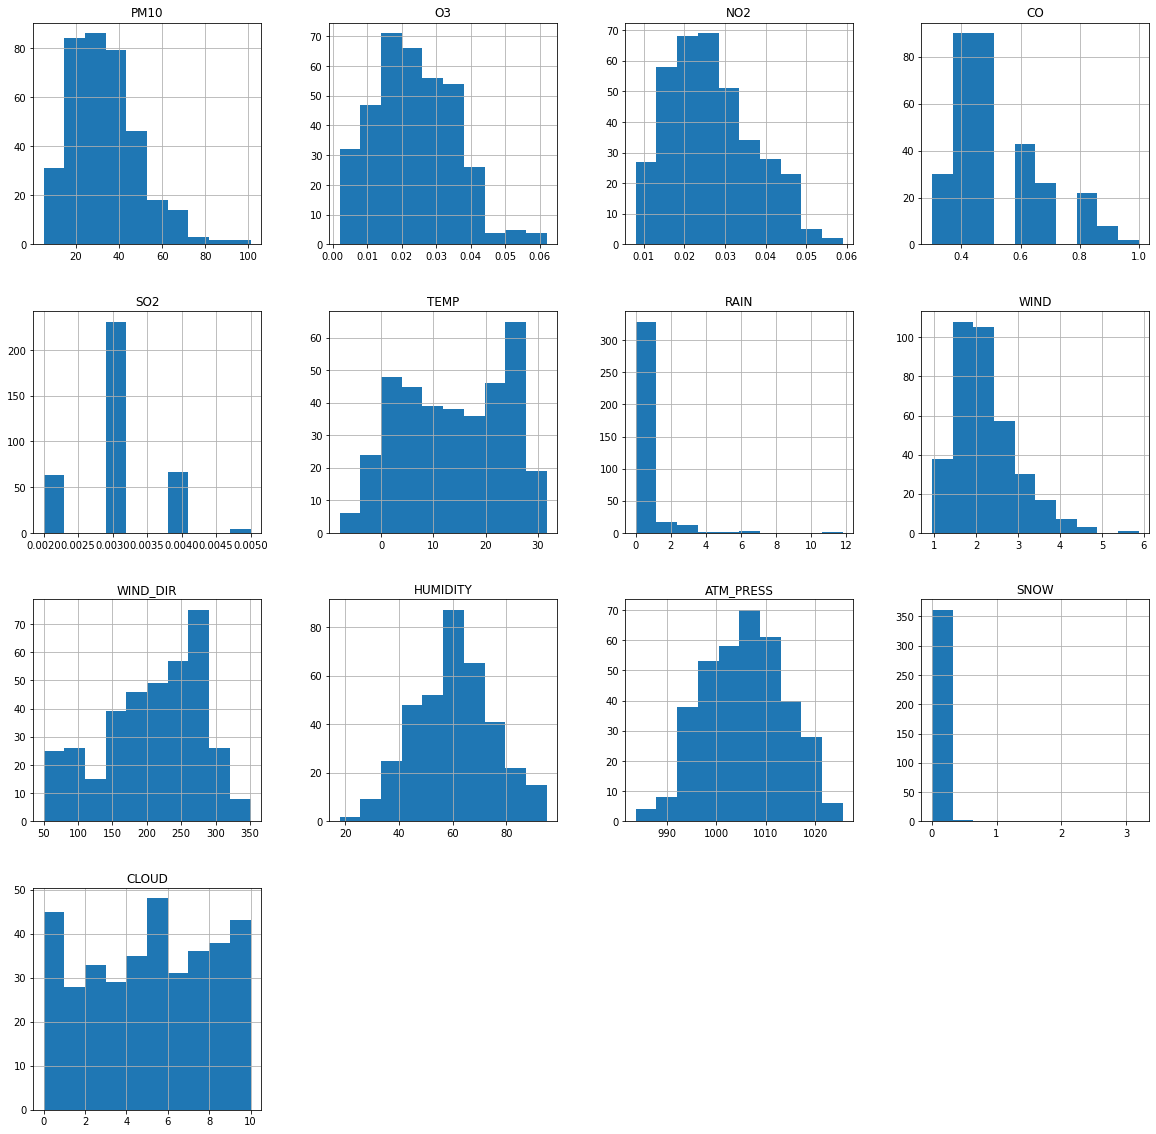

In [7]:
# 전체적인 데이터의 히스토그램으로 제거해야할 변수 선택
df_raw.hist(figsize = (20,20))

In [8]:
# 히스토그램의 관찰 결과, 측정 기간 동안 'SNOW'는 거의 없었다고 볼 수 있으므로 변수 삭제
df_raw = df_raw.loc[:, ['MeasDate','PM10','O3','NO2','CO','SO2','TEMP','RAIN','WIND','WIND_DIR','HUMIDITY','ATM_PRESS','CLOUD']]
df_raw

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-06-26,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,8.73
362,2020-06-27,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,6.21
363,2020-06-28,27.0,0.044,0.009,0.4,0.003,25.03,0.00,2.35,283,71.3,994.7,2.63
364,2020-06-29,36.0,0.026,0.028,0.6,0.003,24.06,1.26,2.48,103,75.5,992.9,7.58


In [9]:
#PM!0, 03 , NO2, SO2 결측치는 같은 인덱스에 있어 제거함.
df_raw[df_raw['PM10'].isnull()]

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD
328,2020-05-24,NaN,NaN,NaN,NaN,NaN,17.48,1.45,2.85,257,83.3,999.4,8.21


In [10]:
# CO의 결측치 값이 55개이므로, 결측치 값을 평균값으로 대체
means= df_raw["CO"].mean().round(1)
df_raw["CO"] = df_raw["CO"].fillna(means)

In [11]:
df_raw = df_raw.dropna()
df_raw

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-06-26,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,8.73
362,2020-06-27,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,6.21
363,2020-06-28,27.0,0.044,0.009,0.4,0.003,25.03,0.00,2.35,283,71.3,994.7,2.63
364,2020-06-29,36.0,0.026,0.028,0.6,0.003,24.06,1.26,2.48,103,75.5,992.9,7.58


In [12]:
# 결측치 처리 후, 데이터 통계량 파악
df_raw.describe()

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,33.421918,0.023600,0.026814,0.514521,0.003033,13.853890,0.378712,2.223589,209.320548,60.232055,1005.866575,5.055397
std,15.937983,0.011896,0.010271,0.141159,0.000632,9.841944,1.122268,0.723421,70.788136,14.504766,8.130936,2.985655
min,5.000000,0.002000,0.008000,0.300000,0.002000,-7.950000,0.000000,0.940000,50.000000,17.900000,983.800000,0.000000
25%,22.000000,0.014000,0.019000,0.400000,0.003000,5.480000,0.000000,1.720000,160.000000,49.600000,999.400000,2.500000
50%,31.000000,0.023000,0.025000,0.500000,0.003000,13.870000,0.000000,2.090000,221.000000,61.000000,1006.500000,5.290000
75%,42.000000,0.032000,0.034000,0.600000,0.003000,23.100000,0.100000,2.620000,266.000000,69.800000,1011.600000,7.540000
max,101.000000,0.062000,0.059000,1.000000,0.005000,31.720000,11.800000,5.880000,351.000000,95.000000,1025.500000,10.000000


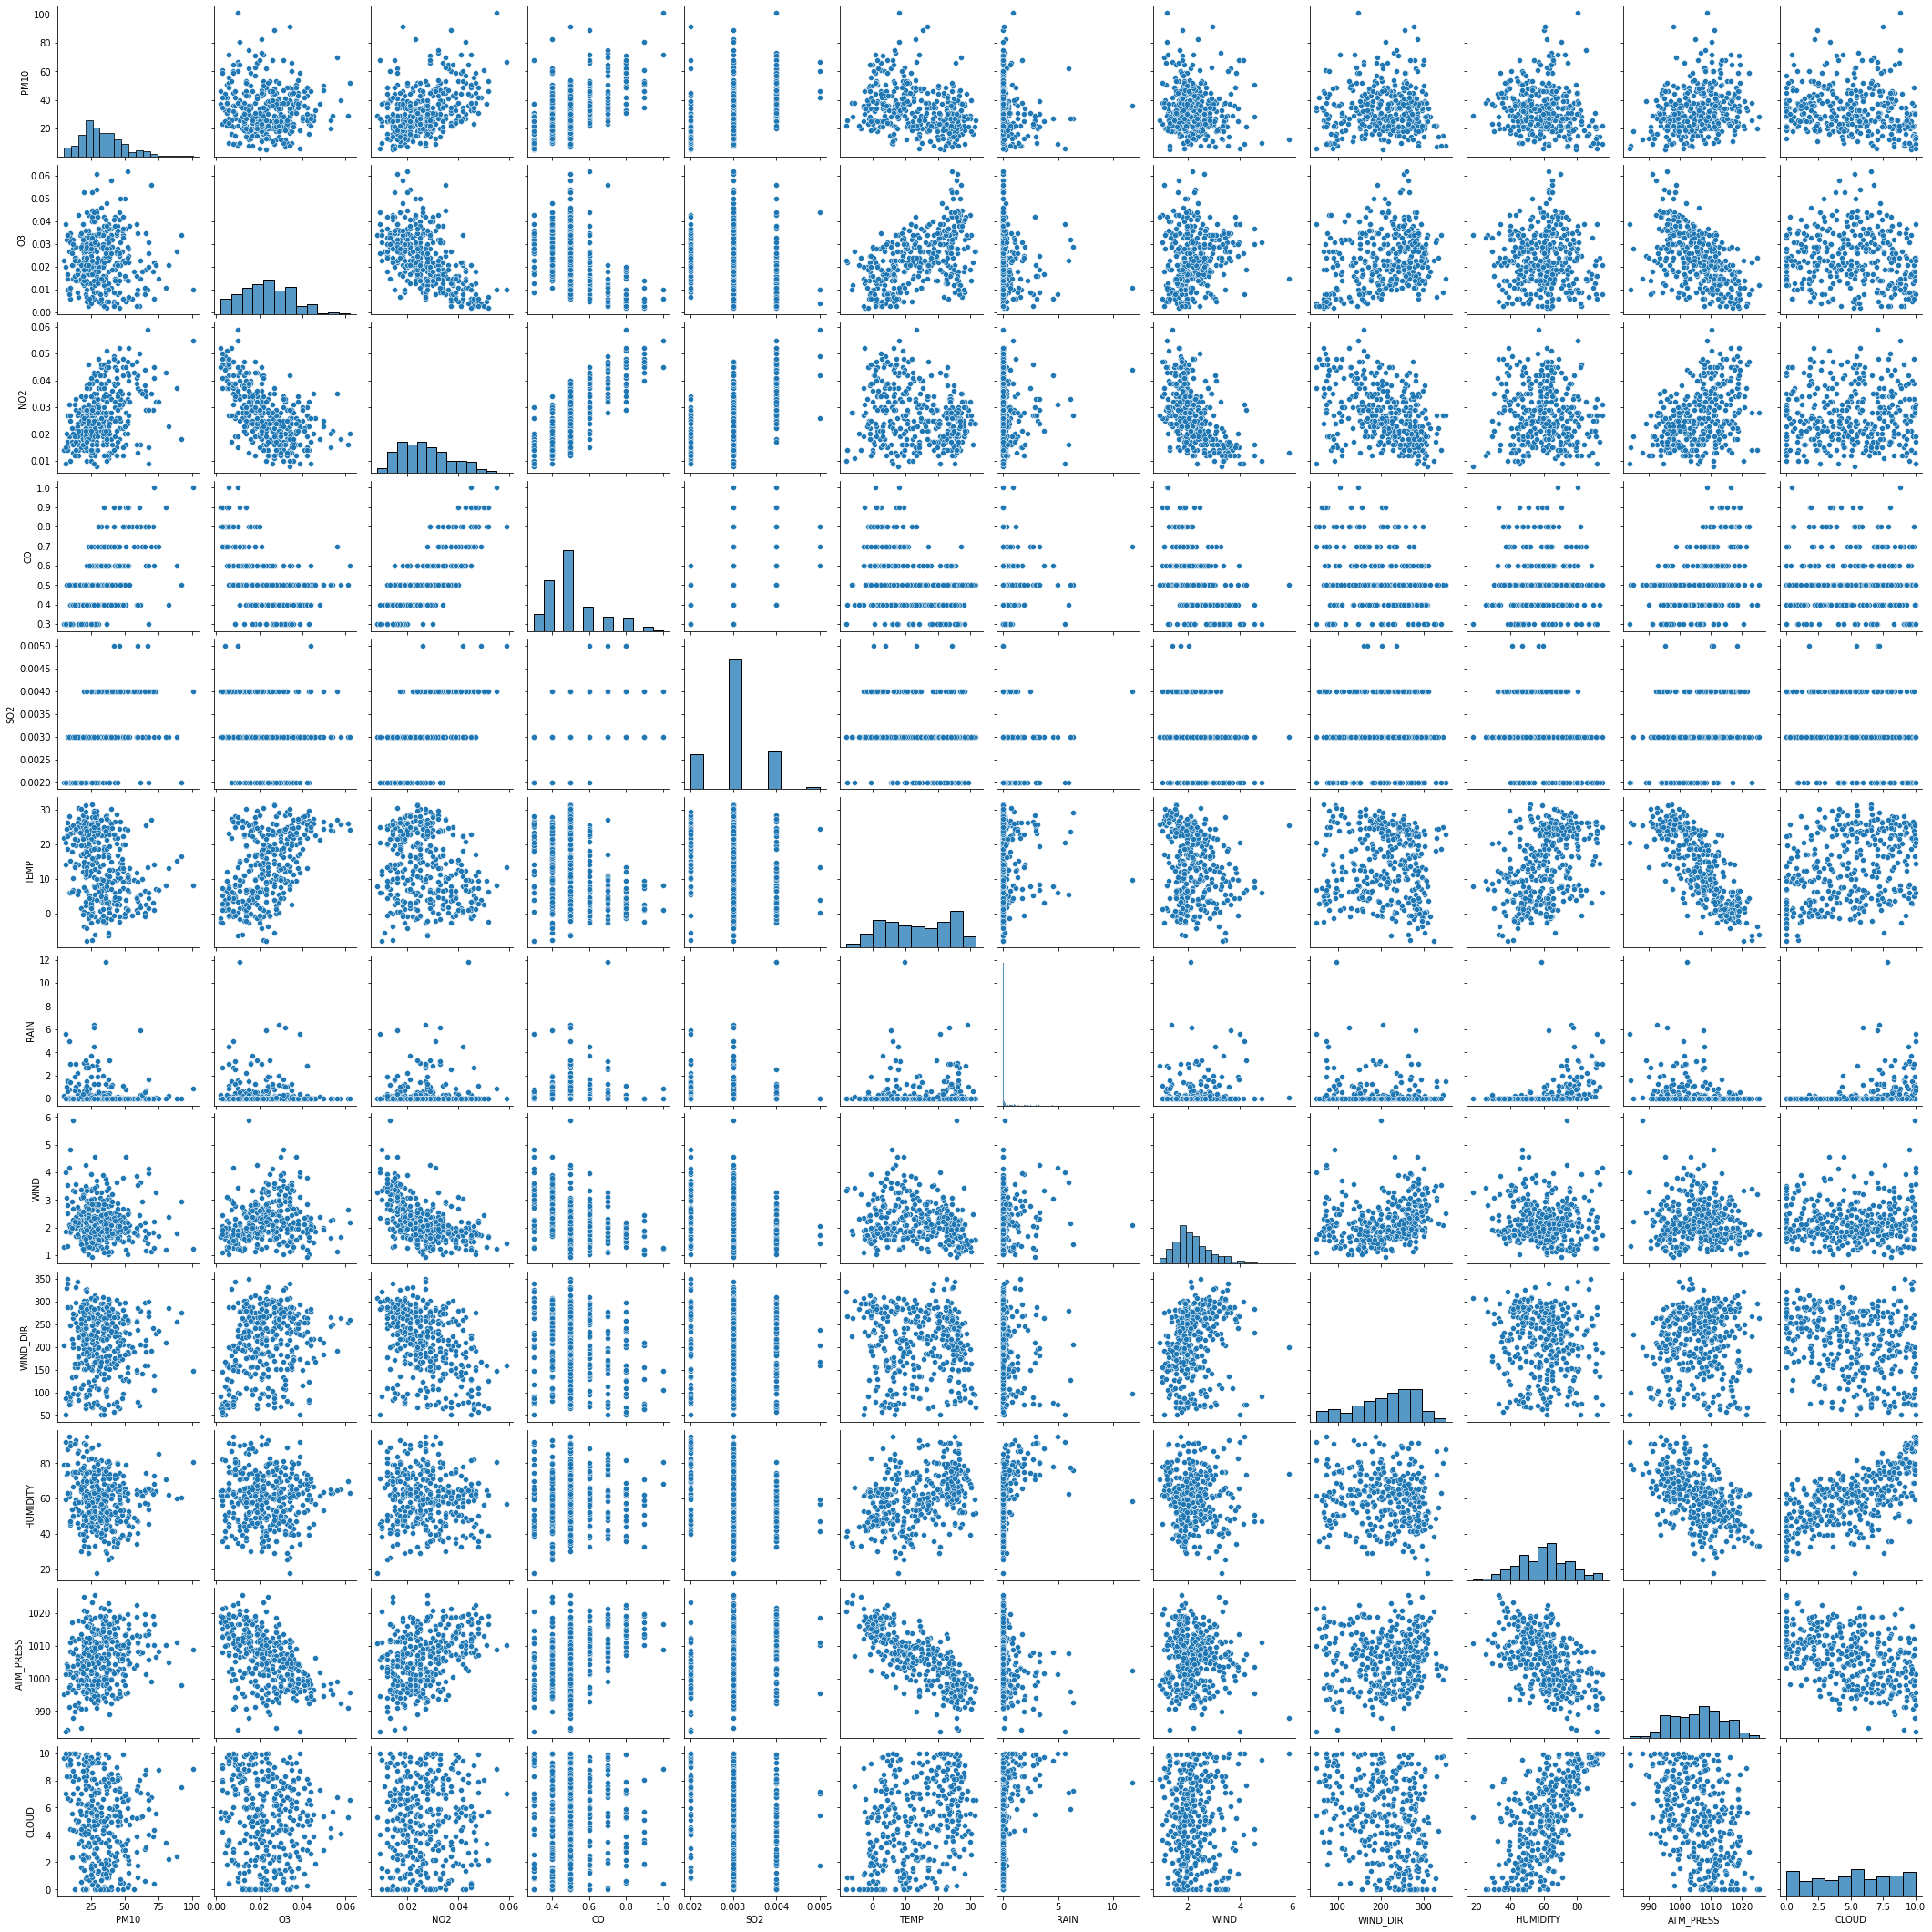

In [13]:
#산점도 행렬 출력
sns.pairplot(df_raw)

In [14]:
# MeasDate가 없는 Heatmap 출력을 위해 df_raw_nodate 생성
df_raw_nodate = df_raw.loc[:, ['PM10','O3','NO2','CO','SO2','TEMP','RAIN', 'WIND','WIND_DIR','HUMIDITY','ATM_PRESS','CLOUD']]
df_raw_nodate

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD
0,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,5.70
1,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,3.83
2,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,6.29
3,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,2.54
4,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...
361,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,8.73
362,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,6.21
363,27.0,0.044,0.009,0.4,0.003,25.03,0.00,2.35,283,71.3,994.7,2.63
364,36.0,0.026,0.028,0.6,0.003,24.06,1.26,2.48,103,75.5,992.9,7.58


In [15]:
# Dummy 함수 사용
df_raw_dummy = pd.get_dummies(df_raw_nodate)
df_raw_dummy

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD
0,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,5.70
1,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,3.83
2,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,6.29
3,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,2.54
4,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...
361,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,8.73
362,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,6.21
363,27.0,0.044,0.009,0.4,0.003,25.03,0.00,2.35,283,71.3,994.7,2.63
364,36.0,0.026,0.028,0.6,0.003,24.06,1.26,2.48,103,75.5,992.9,7.58


In [16]:
# Normalizer 적용
from sklearn.preprocessing import Normalizer

In [17]:
# Scale 변환 : Normalizer scaler (평균, 표준편차 적용)
df_scale_normal = Normalizer()
df_scale_normal = df_scale_normal.fit_transform(df_raw_dummy)
df_scale_normal

array([[2.81982223e-02, 5.25070346e-05, 2.04194023e-05, ...,
        6.14526775e-02, 9.67587965e-01, 5.54240921e-03],
       [2.51034114e-02, 5.11723386e-05, 1.93103165e-05, ...,
        6.10206000e-02, 9.64164101e-01, 3.69792560e-03],
       [2.88569000e-02, 4.03996601e-05, 2.21236234e-05, ...,
        6.28118524e-02, 9.60261444e-01, 6.05033004e-03],
       ...,
       [2.60293851e-02, 4.24182572e-05, 8.67646169e-06, ...,
        6.87368576e-02, 9.58941827e-01, 2.53545492e-03],
       [3.59264244e-02, 2.59468621e-05, 2.79427745e-05, ...,
        7.53456956e-02, 9.90870744e-01, 7.56450825e-03],
       [6.06266549e-03, 3.94073257e-05, 9.09399824e-06, ...,
        9.29608709e-02, 9.94075052e-01, 1.01044425e-02]])

In [18]:
# Dataframe으로 변환
df_scale_normal = pd.DataFrame(df_scale_normal, columns = df_raw_dummy.columns)
df_scale_normal

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD
0,0.028198,0.000053,0.000020,0.000486,0.000003,0.023366,0.000000,0.002236,0.242116,0.061453,0.967588,0.005542
1,0.025103,0.000051,0.000019,0.000483,0.000003,0.023452,0.000000,0.002182,0.255862,0.061021,0.964164,0.003698
2,0.028857,0.000040,0.000022,0.000385,0.000003,0.023259,0.000000,0.001722,0.269331,0.062812,0.960261,0.006050
3,0.027103,0.000033,0.000025,0.000387,0.000003,0.024538,0.000000,0.001975,0.254579,0.056724,0.964689,0.002459
4,0.028695,0.000045,0.000035,0.000495,0.000003,0.027013,0.000000,0.001435,0.173162,0.045022,0.983065,0.003879
...,...,...,...,...,...,...,...,...,...,...,...,...
360,0.018525,0.000038,0.000016,0.000390,0.000003,0.021118,0.000400,0.003042,0.222297,0.081899,0.971085,0.008512
361,0.021524,0.000043,0.000017,0.000391,0.000004,0.023422,0.000000,0.001888,0.212309,0.068291,0.974273,0.006076
362,0.026029,0.000042,0.000009,0.000386,0.000003,0.024130,0.000000,0.002266,0.272827,0.068737,0.958942,0.002535
363,0.035926,0.000026,0.000028,0.000599,0.000003,0.024011,0.001257,0.002475,0.102789,0.075346,0.990871,0.007565


In [19]:
# Scale 변환 결과값을 Descrie를 통해 확인 
df_scale_desc = df_scale_normal.describe()
df_scale_desc.round(10)

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD
count,365.000000,365.000000,365.000000,365.000000,3.650000e+02,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,0.032344,0.000023,0.000026,0.000499,2.937600e-06,0.013487,0.000371,0.002152,0.201885,0.058417,0.974428,0.004916
std,0.015356,0.000012,0.000010,0.000137,6.123000e-07,0.009621,0.001104,0.000697,0.066125,0.014357,0.012598,0.002920
min,0.004906,0.000002,0.000008,0.000280,1.874800e-06,-0.007421,0.000000,0.000919,0.048779,0.016932,0.940395,0.000000
25%,0.021011,0.000014,0.000018,0.000389,2.846900e-06,0.005249,0.000000,0.001665,0.155840,0.047667,0.964164,0.002362
50%,0.029991,0.000022,0.000025,0.000484,2.903900e-06,0.013527,0.000000,0.002025,0.212702,0.059142,0.974653,0.005112
75%,0.041248,0.000031,0.000032,0.000572,2.964800e-06,0.022636,0.000099,0.002527,0.255845,0.068224,0.985036,0.007285
max,0.098275,0.000060,0.000057,0.000974,4.907200e-06,0.031667,0.011688,0.005816,0.329026,0.094202,0.996921,0.010104


In [20]:
#  Scale 변환 결과값의 전체 상관관계 분석
df_scale_normal.corr().round(3)

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD
PM10,1.000,-0.054,0.400,0.557,0.423,-0.299,-0.118,-0.116,-0.005,-0.149,0.006,-0.165
O3,-0.054,1.000,-0.578,-0.503,-0.228,0.528,-0.096,0.159,0.258,-0.023,-0.228,-0.104
NO2,0.400,-0.578,1.000,0.796,0.573,-0.222,0.040,-0.532,-0.444,-0.048,0.447,0.032
CO,0.557,-0.503,0.796,1.000,0.570,-0.336,0.043,-0.406,-0.369,0.060,0.351,0.047
SO2,0.423,-0.228,0.573,0.570,1.000,-0.240,-0.110,-0.267,-0.157,-0.278,0.183,-0.160
TEMP,-0.299,0.528,-0.222,-0.336,-0.240,1.000,0.083,-0.198,-0.048,0.423,0.052,0.351
RAIN,-0.118,-0.096,0.040,0.043,-0.110,0.083,1.000,0.139,-0.188,0.405,0.139,0.362
WIND,-0.116,0.159,-0.532,-0.406,-0.267,-0.198,0.139,1.000,0.189,-0.074,-0.229,0.037
WIND_DIR,-0.005,0.258,-0.444,-0.369,-0.157,-0.048,-0.188,0.189,1.000,-0.139,-0.981,-0.312
HUMIDITY,-0.149,-0.023,-0.048,0.060,-0.278,0.423,0.405,-0.074,-0.139,1.000,0.082,0.643


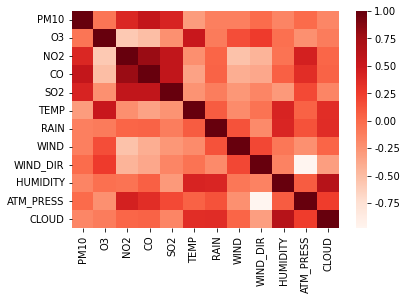

In [21]:
#  Scale 변환 결과값의 Heatmap 출력
sns.heatmap(df_scale_normal.corr(), cmap="Reds")

## 다중선형회귀분석

In [22]:
#상관관계 분석
df_raw.corr().round(3)

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD
PM10,1.000,-0.052,0.396,0.561,0.429,-0.310,-0.121,-0.100,0.020,-0.150,0.253,-0.172
O3,-0.052,1.000,-0.592,-0.513,-0.234,0.516,-0.104,0.165,0.269,-0.038,-0.534,-0.119
NO2,0.396,-0.592,1.000,0.791,0.563,-0.237,0.029,-0.537,-0.408,-0.066,0.420,0.017
CO,0.561,-0.513,0.791,1.000,0.567,-0.362,0.030,-0.403,-0.319,0.044,0.401,0.026
SO2,0.429,-0.234,0.563,0.567,1.000,-0.274,-0.129,-0.253,-0.093,-0.302,0.334,-0.191
TEMP,-0.310,0.516,-0.237,-0.362,-0.274,1.000,0.077,-0.216,-0.050,0.404,-0.792,0.342
RAIN,-0.121,-0.104,0.029,0.030,-0.129,0.077,1.000,0.126,-0.183,0.397,-0.236,0.358
WIND,-0.100,0.165,-0.537,-0.403,-0.253,-0.216,0.126,1.000,0.235,-0.084,-0.054,0.017
WIND_DIR,0.020,0.269,-0.408,-0.319,-0.093,-0.050,-0.183,0.235,1.000,-0.099,0.068,-0.297
HUMIDITY,-0.150,-0.038,-0.066,0.044,-0.302,0.404,0.397,-0.084,-0.099,1.000,-0.510,0.628


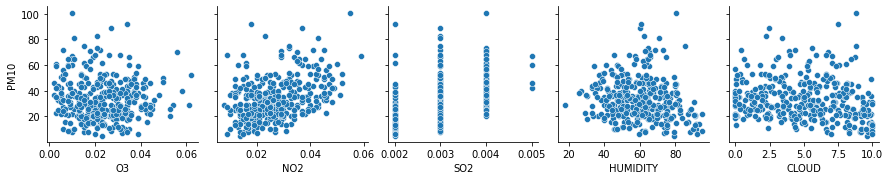

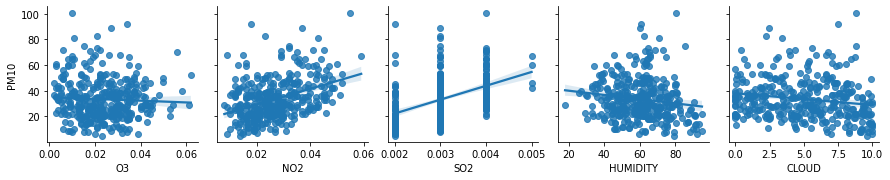

In [23]:
#산점도 행렬:목표변수와 설명변수 지정. kind="scatter"|"reg"
sns.pairplot(df_raw, y_vars="PM10",x_vars=["O3","NO2","SO2","HUMIDITY","CLOUD"])
#회귀 적합선 추가:kind="reg"
sns.pairplot(df_raw, y_vars="PM10",x_vars=["O3","NO2","SO2","HUMIDITY","CLOUD"], kind="reg")

In [24]:
#train/test data 분리 (test_size=0.3)
df_train, df_test = train_test_split(df_raw, test_size=0.3, random_state=1234)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (255, 13)
test data size : (110, 13)


In [25]:
df_train = df_train.drop('MeasDate', axis = 1)
df_train

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD
9,9.0,0.027,0.019,0.3,0.002,22.79,0.82,2.13,80,61.0,997.3,8.29
29,22.0,0.010,0.019,0.5,0.002,28.04,0.17,3.45,203,75.3,997.2,8.33
181,45.0,0.008,0.035,0.6,0.004,3.50,0.20,2.88,69,49.6,1015.5,8.42
262,51.0,0.037,0.016,0.4,0.003,9.48,0.00,4.56,232,47.1,995.3,3.33
286,29.0,0.031,0.014,0.4,0.002,9.88,0.00,3.72,110,60.5,1004.5,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
204,42.0,0.009,0.039,0.7,0.004,-0.64,0.00,1.43,191,37.3,1018.9,1.96
53,29.0,0.044,0.017,0.5,0.003,26.35,0.00,2.13,278,58.6,998.2,5.08
294,12.0,0.030,0.016,0.4,0.002,10.24,0.02,3.33,207,75.3,1000.3,8.00
211,12.0,0.021,0.020,0.4,0.003,6.86,0.03,2.67,98,50.5,1007.7,8.67


In [26]:
#선형 회귀 분석 : formula(y ~ X1 + X2 + ...) 이용. 상수항(intercept) 자동 추가. 코드 중간에서 줄 바꿈 | 추가
reg_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + SO2 + TEMP + RAIN + WIND + WIND_DIR + HUMIDITY + ATM_PRESS + CLOUD", data = df_train)

In [27]:
#적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     22.47
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           2.28e-31
Time:                        16:28:06   Log-Likelihood:                -976.24
No. Observations:                 255   AIC:                             1976.
Df Residuals:                     243   BIC:                             2019.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    298.2898    190.630      1.565      0.1

In [28]:
#설명변수간의 다중공선성의 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train.drop('PM10', axis =1)
df_train_y = df_train['PM10']
#statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x)
df_train_x_const

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,CLOUD
9,1.0,0.027,0.019,0.3,0.002,22.79,0.82,2.13,80,61.0,997.3,8.29
29,1.0,0.010,0.019,0.5,0.002,28.04,0.17,3.45,203,75.3,997.2,8.33
181,1.0,0.008,0.035,0.6,0.004,3.50,0.20,2.88,69,49.6,1015.5,8.42
262,1.0,0.037,0.016,0.4,0.003,9.48,0.00,4.56,232,47.1,995.3,3.33
286,1.0,0.031,0.014,0.4,0.002,9.88,0.00,3.72,110,60.5,1004.5,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...
204,1.0,0.009,0.039,0.7,0.004,-0.64,0.00,1.43,191,37.3,1018.9,1.96
53,1.0,0.044,0.017,0.5,0.003,26.35,0.00,2.13,278,58.6,998.2,5.08
294,1.0,0.030,0.016,0.4,0.002,10.24,0.02,3.33,207,75.3,1000.3,8.00
211,1.0,0.021,0.020,0.4,0.003,6.86,0.03,2.67,98,50.5,1007.7,8.67


In [29]:
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif['Variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i)\
                 for i in range(df_train_x_const.shape[1])]

In [30]:
#VIF 정렬
df_vif.sort_values("VIF",ascending = True).round(2)

,Variable,VIF
6,RAIN,1.55
8,WIND_DIR,1.61
7,WIND,1.87
4,SO2,1.92
11,CLOUD,2.12
9,HUMIDITY,2.72
1,O3,2.76
3,CO,3.55
5,TEMP,4.15
10,ATM_PRESS,4.84


In [31]:
#선형 회귀 분석 : 모델에서 NO2 제거
reg_model = smf.ols(formula = "PM10 ~ O3 + CO + SO2 + TEMP + RAIN + WIND + WIND_DIR + HUMIDITY + ATM_PRESS + CLOUD", data = df_train)
#적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     23.05
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           3.35e-30
Time:                        16:28:06   Log-Likelihood:                -980.92
No. Observations:                 255   AIC:                             1984.
Df Residuals:                     244   BIC:                             2023.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    170.0714    188.868      0.900      0.3

In [32]:
#선형 회귀 분석 : 모델에서 RAIN 제거
reg_model = smf.ols(formula = "PM10 ~ O3 + CO + SO2 + TEMP + WIND + WIND_DIR + HUMIDITY + ATM_PRESS + CLOUD", data = df_train)
#적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     25.71
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           6.44e-31
Time:                        16:28:07   Log-Likelihood:                -980.92
No. Observations:                 255   AIC:                             1982.
Df Residuals:                     245   BIC:                             2017.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.8577    188.212      0.897      0.3

In [33]:
#선형 회귀 분석 : 모델에서 WIND_DIR 제거
reg_model = smf.ols(formula = "PM10 ~ O3 + CO + SO2 + TEMP + WIND + HUMIDITY + ATM_PRESS + CLOUD", data = df_train)
#적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     27.29
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           4.01e-30
Time:                        16:28:07   Log-Likelihood:                -984.70
No. Observations:                 255   AIC:                             1987.
Df Residuals:                     246   BIC:                             2019.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6224    184.040      0.194      0.8

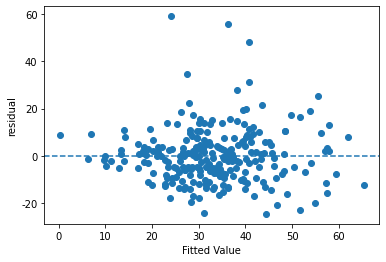

In [34]:
# 잔차 산점도 작성
plt.scatter(reg_result.fittedvalues, reg_result.resid)

plt.xlabel('Fitted Value'); plt.ylabel('residual')
plt.axhline(y=0, linestyle='--')

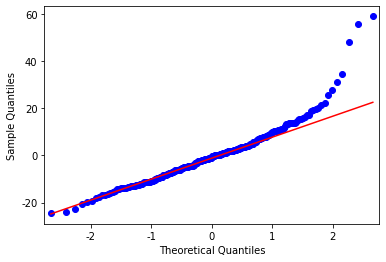

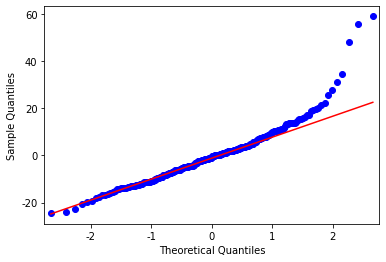

In [35]:
# 잔차 정규성 검정 : Q-Q plot. s-stand
qqplot(reg_result.resid, line = 'q')

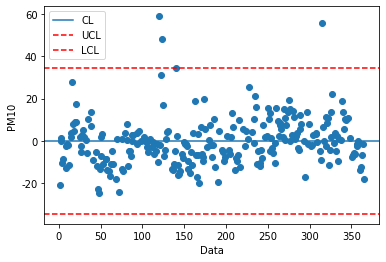

In [36]:
# 잔차의 독립성 확인
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel('Data')
plt.ylabel('PM10')

plt.axhline(y=0, linestyle='-', label='CL')
plt.axhline(y=3*np.std(reg_result.resid), linestyle='--', color='red', label='UCL')
plt.axhline(y=-3*np.std(reg_result.resid), linestyle='dashed', color='red', label='LCL')
plt.legend()

In [37]:
# 평가용 데이터에 대한 성능 확인
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_train['PM10'],train_pred))
print("test data의 결정계수:", r2_score(df_test['PM10'],test_pred))

train data의 결정계수: 0.4702370504226888
test data의 결정계수: 0.4351330717035322


In [38]:
#RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
#목표변수/설명변수 분리
df_train_y = df_train["PM10"]
df_train_x = df_train.drop('PM10', axis = 1)
#sklearn의 선형회귀 모델
model = LinearRegression()
#전체 변수 중 5개의 변수가 남을 때까지는 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_train_x, df_train_y)
#선택된 변수
selected_cols = df_train_x.columns[rfe.support_]
#제거된 변수
removed_cols = df_train_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['O3', 'NO2', 'CO', 'SO2', 'WIND'], dtype='object')
Removed Variables : Index(['TEMP', 'RAIN', 'WIND_DIR', 'HUMIDITY', 'ATM_PRESS', 'CLOUD'], dtype='object')


In [39]:
#회귀 모델 생성
rfe_reg_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + SO2 + WIND", data = df_train)
#적합
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     37.02
Date:                Mon, 15 Aug 2022   Prob (F-statistic):           2.66e-28
Time:                        16:28:08   Log-Likelihood:                -994.84
No. Observations:                 255   AIC:                             2002.
Df Residuals:                     249   BIC:                             2023.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -43.9160      6.793     -6.465      0.0

In [40]:
# No.Observations (분석 자료 수) : 255
# Df Residuals (잔차 자유도) : 249
# Df Model (모델 자유도) : 5
# 분산분석결과 : p값이 '2.66e-28'으로 유의수준 0.05보다 작으므로 회귀모델로서 적합
# 설명력 : '0.415' 으로 모델을 통하여 41.5%를 설명할 수 있음.

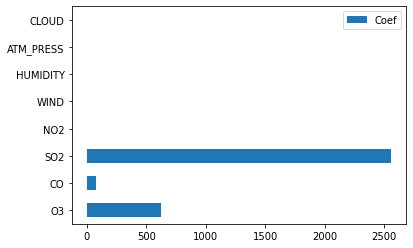

In [41]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef" : reg_result.params.values[1:]},
                          index = ['O3','CO','SO2','NO2','WIND','HUMIDITY','ATM_PRESS', 'CLOUD'])
df_reg_coef.plot.barh(y="Coef")

## RIDEG 선형 회귀모델

In [42]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [43]:
# 목표변수 , 설명변수 데이터 지정
df_scale_y = df_scale_normal["PM10"]
df_scale_x = df_scale_normal.drop("PM10", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_scale_x, df_scale_y, test_size = 0.3, random_state=1234)

In [44]:
# 모델 생성
ridge = Ridge(random_state = 1234, alpha = 1)
ridge.fit(df_train_x, df_train_y)

# 절편값 확인
print(ridge.intercept_)

0.032704629849958915


In [45]:
# 회귀계수 확인
df_ridge_coef = pd.DataFrame({"Coef": ridge.coef_}, index = df_train_x.columns)
df_ridge_coef

,Coef
O3,6.725620e-07
NO2,1.490635e-05
CO,2.698827e-04
SO2,9.747968e-07
TEMP,-8.675605e-03
RAIN,-4.085115e-04
WIND,-2.711712e-04
WIND_DIR,8.353286e-04
HUMIDITY,-8.949207e-03
ATM_PRESS,4.518726e-06


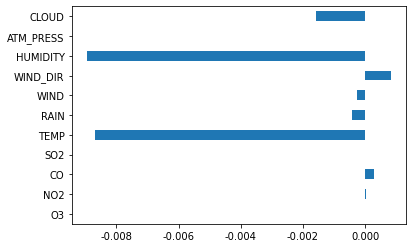

In [46]:
# 회귀계수 그래프
df_ridge_coef.plot.barh(y= "Coef", legend=False)

In [47]:
# 모델의 성능
train_pred = ridge.predict(df_train_x)
test_pred = ridge.predict(df_test_x)
print("train 데이터의 결정계수 : ", r2_score(df_train_y, train_pred))
print("test 데이터의 결정계수 : ", r2_score(df_test_y, test_pred))

train 데이터의 결정계수 :  0.005536532300762009
test 데이터의 결정계수 :  0.005357578079118186


## 의사결정나무

In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

from sklearn.preprocessing import StandardScaler # Scale 변환 -> 표준화 회귀계수 산출
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.tree import export_graphviz
import graphviz # 나무 구조 시각화

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from imblearn.over_sampling import SMOTE

In [49]:
#데이터 분할
df_train, df_test = train_test_split(df_scale_normal, test_size = 0.3, random_state=1234)

print("분할 후 설명변수 데이터 : Train", df_train.shape, " Test", df_test.shape)

분할 후 설명변수 데이터 : Train (255, 12)  Test (110, 12)


In [50]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set :{:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set :1.000
Score on test set: 0.122


In [51]:
tree_uncustomized

DecisionTreeRegressor(random_state=1234)

In [52]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf : 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1,30)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234
                                 , min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

#모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.122
1,2,0.934,0.149
2,3,0.869,0.281
3,4,0.829,0.300
4,5,0.777,0.276
5,6,0.740,0.331
6,7,0.709,0.304
7,8,0.668,0.338
8,9,0.637,0.397
9,10,0.590,0.358


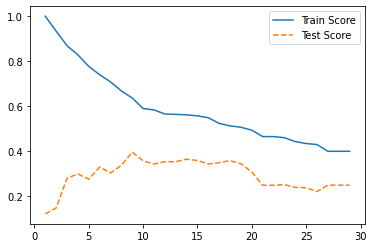

In [53]:
# 모델 설명력에 대한 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

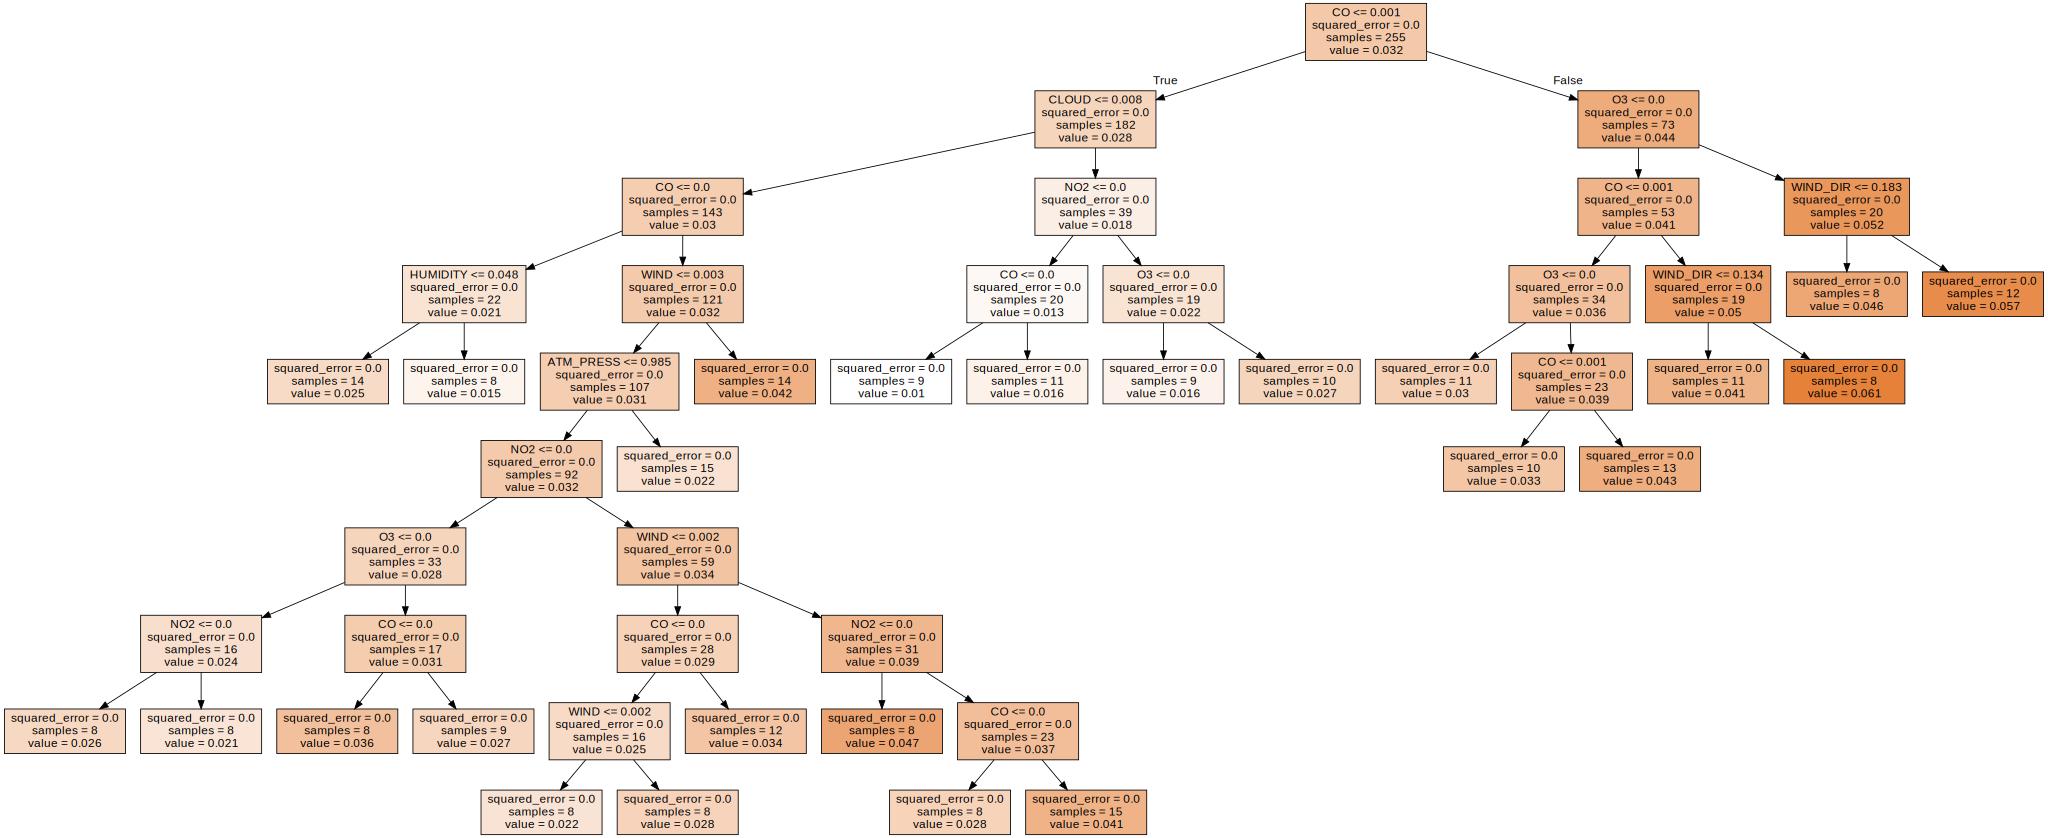

In [54]:
#변수명 저장
v_feature_name = df_train_x.columns

#잎사귀 노드의 최소 자료수 = 8 모델
tree_graph = DecisionTreeRegressor(min_samples_leaf = 8, random_state=1234)
tree_graph.fit(df_train_x, df_train_y)

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성 : 모델 시각화
export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names = v_feature_name, impurity = True, filled = True)

#위에서 생성된 tree.dot 파일을 Graphviz로 읽어서 시각화
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [55]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []

# min_samples_split : 분리 노드의 최소 자료 수 *참조 : para_split : [4,6,8,...,38]
para_split = [n_split*2 for n_split in range(2,30)]

for v_min_samples_split in para_split :
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 결과저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.668,0.338
1,6,0.668,0.338
2,8,0.668,0.338
3,10,0.668,0.338
4,12,0.668,0.338
5,14,0.668,0.338
6,16,0.668,0.338
7,18,0.658,0.344
8,20,0.614,0.329
9,22,0.602,0.337


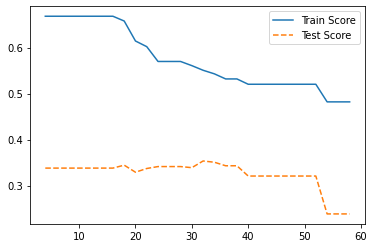

In [56]:
# 모델 설명력에 대한 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

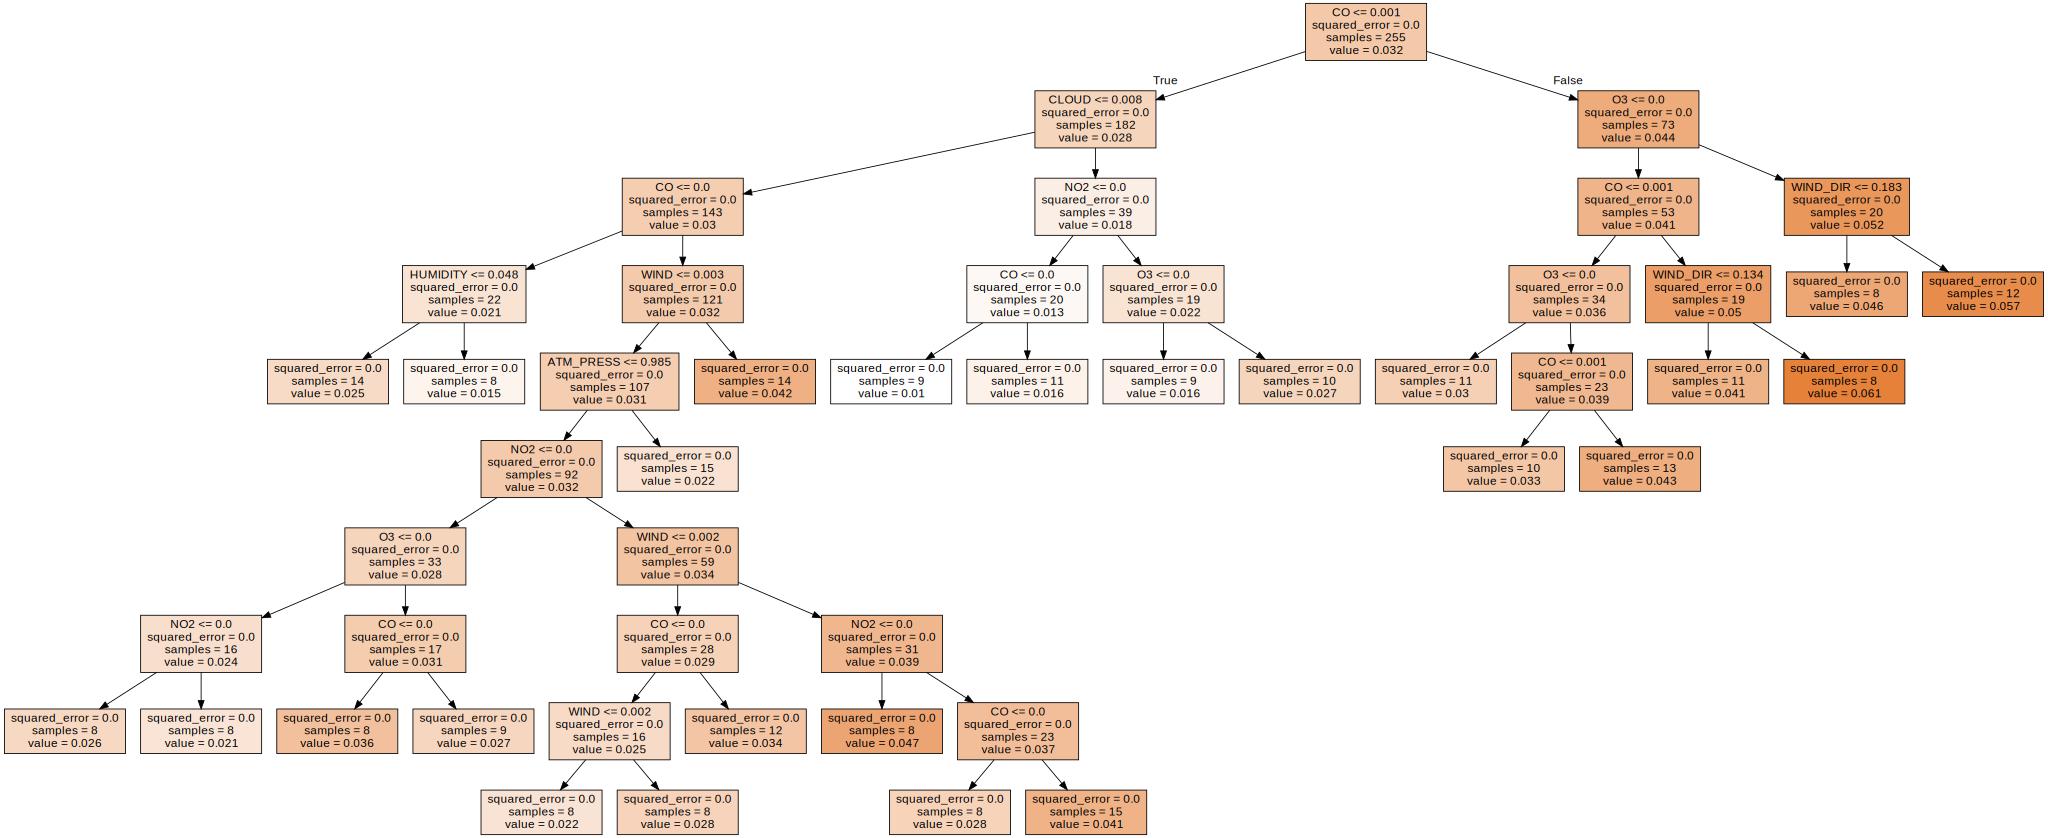

In [57]:
#잎사귀 노드의 최소 자료수 = 20 모델
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split=20)
tree_graph.fit(df_train_x, df_train_y)

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성 : 모델 시각화
export_graphviz(tree_graph, out_file="tree_split.dot", feature_names = v_feature_name, impurity = True, filled = True)

#위에서 생성된 tree.dot 파일을 Graphviz로 읽어서 시각화
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [58]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []

# min_depth : 최대 깊이 변경 *참조 : para_split : [1,2,3,...,10]
para_depth = [depth for depth in range(1,11)]             
for v_max_depth in para_depth :
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8, min_samples_split=20,  max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

# 모델 설명력 확인
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.668,0.338
1,6,0.668,0.338
2,8,0.668,0.338
3,10,0.668,0.338
4,12,0.668,0.338
5,14,0.668,0.338
6,16,0.668,0.338
7,18,0.658,0.344
8,20,0.614,0.329
9,22,0.602,0.337


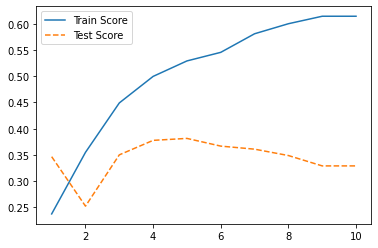

In [59]:
# 모델 설명력에 대한 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

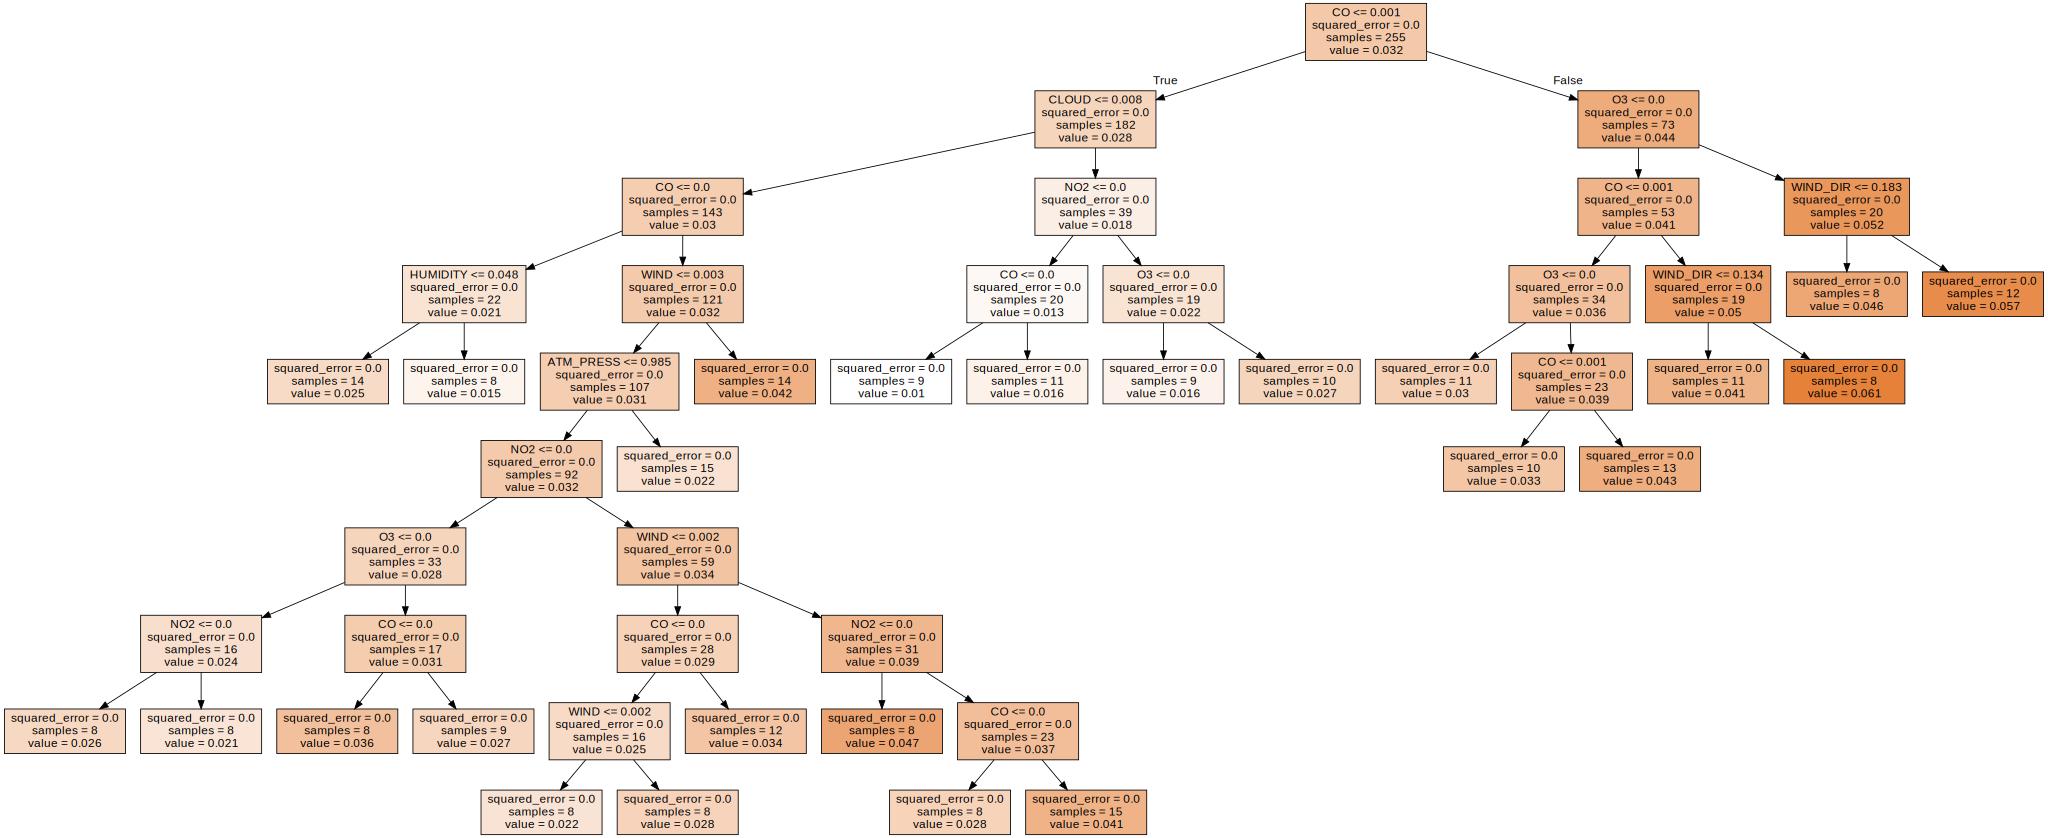

In [60]:
#잎사귀 노드의 최소 자료수 = 2 모델
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8, min_samples_split=20, max_depth = 2)
tree_graph.fit(df_train_x, df_train_y)

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성 : 모델 시각화
export_graphviz(tree_graph, out_file="tree_depth.dot", feature_names = v_feature_name, impurity = True, filled = True)

#위에서 생성된 tree.dot 파일을 Graphviz로 읽어서 시각화
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [61]:
# 최종 모델 선정
tree_final = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split = 20, max_depth = 4, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=20,
                      random_state=1234)

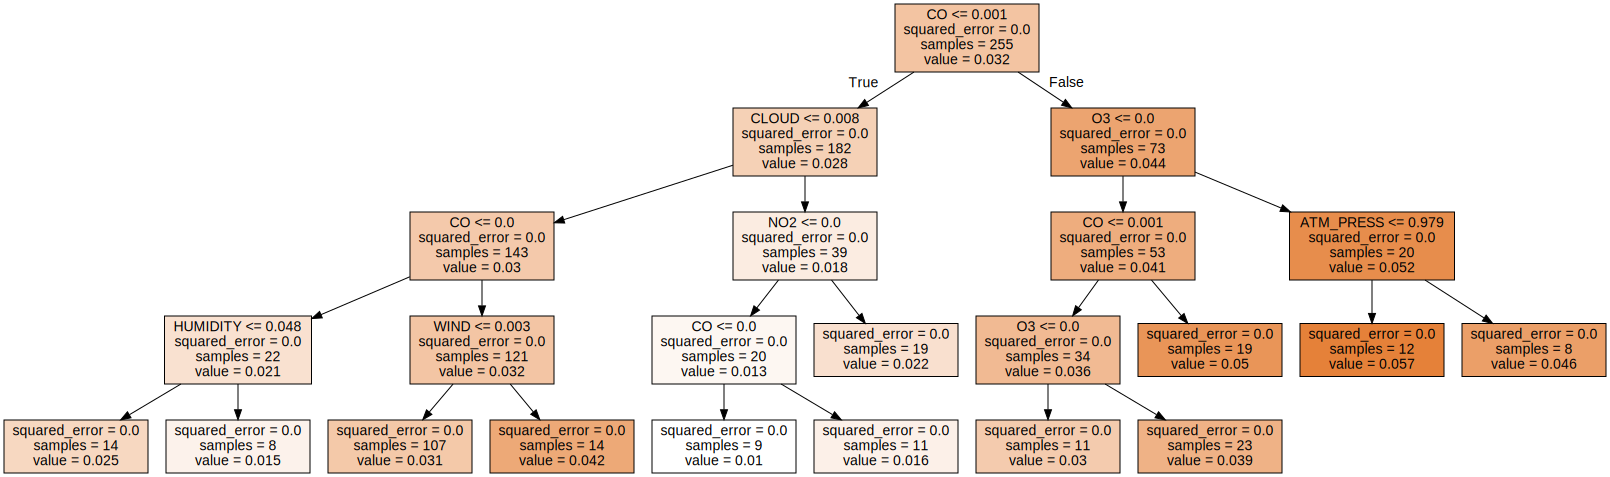

In [62]:
#최종 모델 시각화
export_graphviz(tree_final, out_file="tree_final.dot", feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [63]:
# tree.feature_importance_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,CO,0.626
10,CLOUD,0.168
0,O3,0.089
6,WIND,0.057
1,NO2,0.023
9,ATM_PRESS,0.020
8,HUMIDITY,0.017
3,SO2,0.000
4,TEMP,0.000
5,RAIN,0.000


Text(0, 0.5, '변수')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_

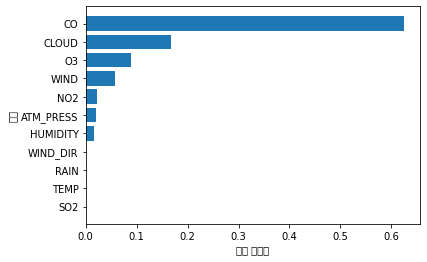

In [64]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending= True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

## 랜덤포레스트

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [66]:
df_raw_x = df_scale_normal.drop("PM10", axis = 1, inplace = False)
df_raw_y = df_scale_normal["PM10"]

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4,
                                                                random_state=1234)

print("분할 전 설명변수 데이터 : ", df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train", df_train_x.shape, " Test", df_test_x.shape)

분할 전 설명변수 데이터 :  (365, 11)
분할 후 설명변수 데이터 : Train (219, 11)  Test (146, 11)


In [67]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on training set :{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set :{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set :0.917
Accuracy on test set :0.467


In [68]:
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
  rf = RandomForestRegressor(n_estimators=v_n_estimators, random_state=1234)
  rf.fit(df_train_x, df_train_y)
  train_accuracy.append(rf.score(df_train_x, df_train_y))
  test_accuracy.append(rf.score(df_test_x, df_test_y))


df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"]= test_accuracy

df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.880,0.449
1,20,0.903,0.447
2,30,0.913,0.474
3,40,0.915,0.464
4,50,0.919,0.467
5,60,0.917,0.459
6,70,0.916,0.456
7,80,0.917,0.459
8,90,0.917,0.464
9,100,0.917,0.467


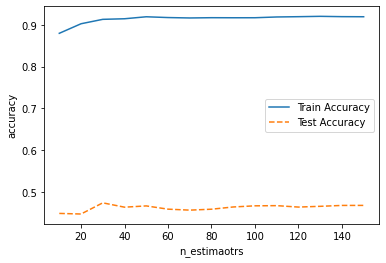

In [69]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimaotrs");plt.ylabel("accuracy")
plt.legend()

In [70]:
oob_error = []

for v_n_estimator in range(1, 151):
  rf = RandomForestRegressor(n_estimators = v_n_estimator, oob_score = True, random_state=1234)
  rf.fit(df_train_x, df_train_y)
  oob_error.append(1 - rf.oob_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

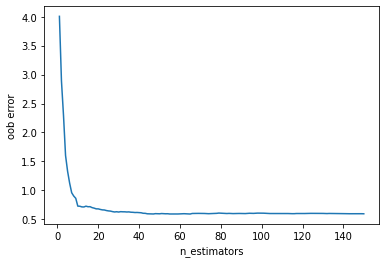

In [71]:
plt.plot(range(1,151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

n_estimators = 150

In [72]:
train_accuracy = []
test_accuracy = []

para_depth = [n_depth for n_depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators = n_estimators, 
                              max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_score
df_accuracy_depth['TestAccuracy'] = test_score
df_accuracy_depth.round(3)

,depth,TrainAccuracy,TestAccuracy
0,1,0.237,0.347
1,2,0.355,0.252
2,3,0.449,0.350
3,4,0.500,0.378
4,5,0.529,0.381
5,6,0.546,0.367
6,7,0.581,0.361
7,8,0.600,0.349
8,9,0.614,0.329
9,10,0.614,0.329


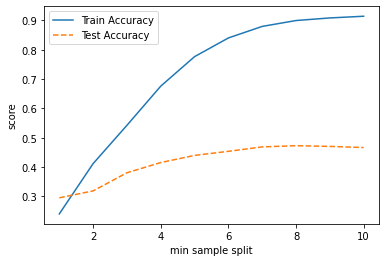

In [73]:
df_accuracy_depth
plt.plot(para_depth, train_accuracy, linestyle="-", label ="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel('min sample split')
plt.ylabel('score')
plt.legend();
max_depth = 4

In [74]:
train_accuracy = []
test_accuracy = []

para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators = n_estimators,
                               max_depth= max_depth,
                               min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesLeaf'] = para_split
df_accuracy_split['TrainScore'] = train_score
df_accuracy_split['TestScore'] = test_score
df_accuracy_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,10,0.237,0.347
1,20,0.355,0.252
2,30,0.449,0.350
3,40,0.500,0.378
4,50,0.529,0.381
5,60,0.546,0.367
6,70,0.581,0.361
7,80,0.600,0.349
8,90,0.614,0.329
9,100,0.614,0.329


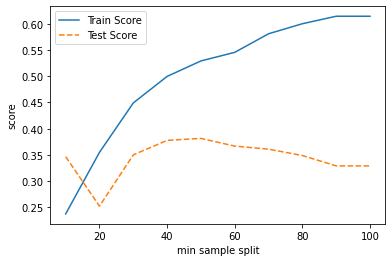

In [75]:
plt.plot(para_split, train_score, linestyle='-', label='Train Score')
plt.plot(para_split, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('min sample split')
plt.legend();

In [76]:
train_score = []
test_score = []

para_leaf = [n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators = n_estimators,
                                max_depth= max_depth,
                              min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,10,0.564,0.389
1,20,0.449,0.339
2,30,0.351,0.337
3,40,0.289,0.255
4,50,0.190,0.141
5,60,0.181,0.161
6,70,0.073,0.059
7,80,-0.000,-0.030
8,90,-0.000,-0.030
9,100,-0.000,-0.030


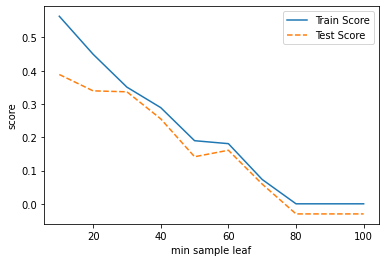

In [77]:
plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label='Test Score')
plt.ylabel('score')
plt.xlabel('min sample leaf')
plt.legend();

In [78]:
rf_final= RandomForestRegressor(random_state=1234,n_estimators=140, min_samples_leaf=10, max_depth = 5)
rf_final.fit(df_train_x, df_train_y)

print('train data의 결정계수:', rf_final.score(df_train_x,df_train_y))
print('test data의 결정계수:', rf_final.score(df_test_x,df_test_y))

train data의 결정계수: 0.5967738424550431
test data의 결정계수: 0.39682261146948417


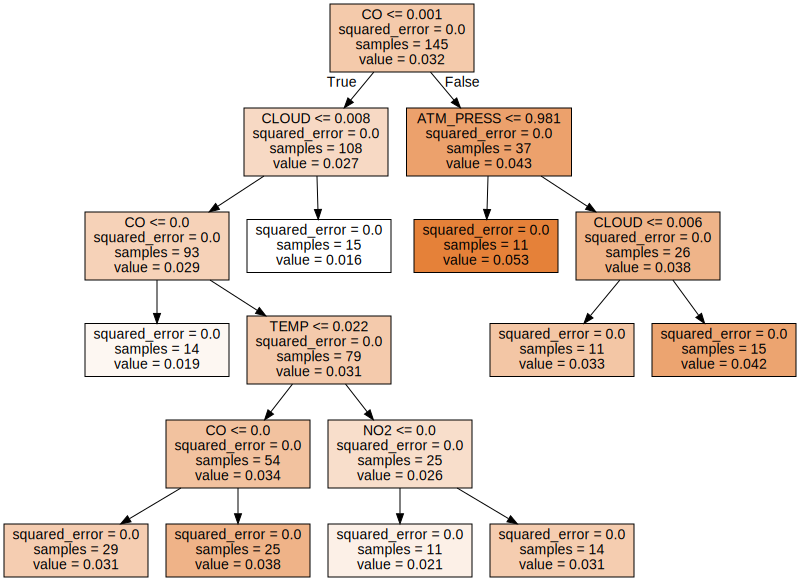

In [79]:
v_feature_name = df_train_x.columns
export_graphviz(rf_final.estimators_[0], out_file='rfr_final_10_hw.dot',
               feature_names = v_feature_name,impurity=True,filled=True)
with open('rfr_final_10_hw.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [80]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values('Importance',ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,CO,0.417
10,CLOUD,0.143
0,O3,0.138
4,TEMP,0.086
1,NO2,0.064
9,ATM_PRESS,0.050
8,HUMIDITY,0.034
6,WIND,0.034
7,WIND_DIR,0.021
3,SO2,0.007


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_

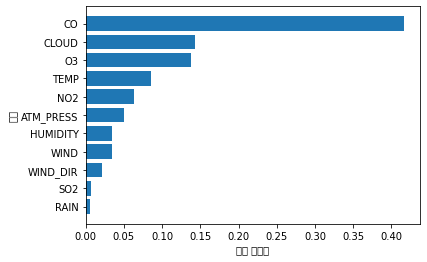

In [81]:
df_importance.sort_values('Importance',ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(coordinates, df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수');